In [9]:
from sklearn.externals import joblib
import pandas as pd

In [3]:
with open('data/amazon.pkl','rb') as f:
    data = joblib.load(f)

In [4]:
data


{'vectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=1000, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words='english', strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=None),
 'tdm': <1000x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 4060 stored elements in Compressed Sparse Row format>,
 'sentiment': 0      0
 1      1
 2      1
 3      0
 4      1
 5      0
 6      0
 7      1
 8      0
 9      0
 10     1
 11     1
 12     0
 13     1
 14     0
 15     1
 16     0
 17     1
 18     1
 19     0
 20     0
 21     1
 22     0
 23     1
 24     0
 25     1
 26     1
 27     0
 28     0
 29     0
       ..
 970    0
 971    1
 972    0
 973    0
 974    0
 975    1
 976    1
 977  

In [5]:
# 꼭 써줘야 된다. 
locals().update(data)

### 단서 사용 합구하기

In [6]:
# 열은 단어, 행은 문서
count = tdm.sum(axis=0)

In [7]:
count

matrix([[ 1.76034794,  0.46521938,  0.51050599,  0.47327189,  0.81124278,
          0.48895273,  0.51932284,  0.37958827,  0.70603291,  0.52515773,
          0.46389436,  0.3966342 ,  0.33259944,  0.40192999,  0.40273484,
          0.40513104,  0.40373467,  0.40097101,  0.49321969,  0.4257456 ,
          0.42941947,  0.37253524,  1.17998944,  0.33259944,  1.25277118,
          0.64296325,  0.63859278,  0.35543352,  0.48095155,  0.51694636,
          0.5343188 ,  0.6246444 ,  0.81343481,  1.85628524,  0.72724445,
          0.78408949,  2.47784589,  0.36594895,  1.08441939,  0.72724445,
          0.98078323,  0.7131251 ,  0.79472748,  0.58547689,  0.77085026,
          1.38812138,  0.45418589,  0.49845349,  0.48900131,  0.45432884,
          0.42395857,  0.89124114,  0.30779093,  0.66002397,  1.23836425,
          0.89717198,  1.61853182,  1.        ,  1.75957145,  0.42216143,
          0.48274968,  0.461336  ,  0.48928136,  0.99275685,  0.51843768,
          0.37052941,  0.89613276,  0.

### 단어 빈도 표 만들기

In [13]:
word_count = pd.DataFrame({'단어':vectorizer.get_feature_names(),'빈도':count.flat})
word_count.tail()
# flat = 1차원으로 만들어준다.

C:\Users\p\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
995,wrongly,0.396701
996,year,3.274197
997,years,3.972779
998,yell,0.539954
999,yes,0.638298


In [15]:
sort_df = word_count.sort_values('빈도',ascending=False)
sort_df.head()

,단어,빈도
459,phone,46.663864
310,great,40.657307
306,good,29.231608
522,product,23.608777
985,works,21.664389


In [16]:
!pip install WordCloud

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [19]:
word_cloud_dict = dict(zip(word_count['단어'],word_count['빈도']))
list(word_cloud_dict.items())[100:105]

[('awesome', 2.8419500431604723),
 ('awful', 1.9911216404387013),
 ('background', 1.2072072657580095),
 ('bad', 7.446001437661592),
 ('bar', 0.9990328433579316)]

In [21]:
wc = WordCloud(background_color='white' ,width=400,height=200)

### 시각화

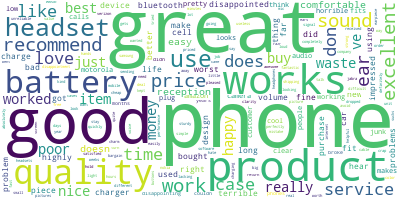

In [23]:
cloud = wc.fit_words(word_cloud_dict)
cloud.to_image()

In [24]:
def get_nouns(text):
    nouns = tagger.nouns(text)
    nouns = [word for word in nouns if len(word)>1]
    nouns = [word for word in nouns if not re.match(r'\d+', word)]
    return nouns

In [27]:
with open('data/hot-news.pkl','rb') as f:
    data = joblib.load(f)

In [28]:
# 꼭 써줘야 된다. 
locals().update(data)

In [30]:
word_count = pd.DataFrame({'단어':vectorizer.get_feature_names(),'빈도':tdm.sum(axis=0).flat})
word_count.tail()
# flat = 1차원으로 만들어준다.

C:\Users\p\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
995,훈련,94
996,휴가,176
997,휴가철,245
998,휴식,344
999,휴일,144


In [31]:
word_cloud_dict = dict(zip(word_count['단어'],word_count['빈도']))
list(word_cloud_dict.items())[100:105]

[('공장', 99), ('과일', 90), ('관계', 92), ('관계자', 267), ('관광객', 172)]

In [40]:
kr_wc = WordCloud(background_color='white' ,width=400,height=200,font_path='C:\Windows\Fonts\HMKMMAG.TTF')

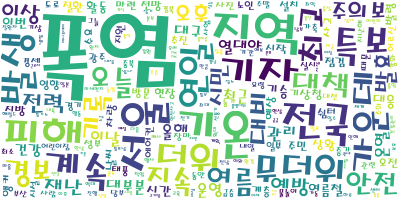

In [42]:
cloud = kr_wc.fit_words(word_cloud_dict)
cloud.to_image()